In [100]:
import constants
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("assignment-sample-data-cleaned.csv")
account_type_mapping = constants.ACCOUNT_TYPE_MAPPING
df["account_type"] = df["account_type"].map(account_type_mapping)
df_agg = pd.read_csv("aggregated-user-data.csv")

## Transaction metrics

In [102]:
print(df["account_type"].value_counts())
print(df.describe())
df.head()

account_type
0    52882
1    28415
Name: count, dtype: int64
       parking_fee_sek  parking_duration       weekday  registered_cars  \
count     81297.000000      81297.000000  81297.000000     81297.000000   
mean         31.522275          3.217840      0.885186         7.576024   
std          32.566117          4.352361      0.318799         5.218888   
min           0.070000          0.003611      0.000000         1.000000   
25%          10.280000          0.772222      1.000000         4.000000   
50%          19.950000          1.582222      1.000000         6.000000   
75%          40.000000          3.636111      1.000000        10.000000   
max         268.110600         48.000000      1.000000        24.000000   

         n_parkings  parking_activity  account_type  
count  81297.000000      81297.000000  81297.000000  
mean     766.139747          0.471408      0.349521  
std      708.475600          0.330703      0.476822  
min        6.000000          0.005571      0.00

,parkinguser_id,area_type,parking_fee_sek,parking_duration,weekday,registered_cars,n_parkings,parking_activity,account_type
0,fake_e764113cde,SurfaceLot,11.5000,1.906667,1,9,893,0.786092,0
1,fake_87f457ddef,SurfaceLot,13.0566,0.879167,1,20,429,0.161036,0
2,fake_61d32bf6c5,OnStreet,173.3300,8.662778,1,2,121,0.200000,1
3,fake_dcec7e9cf0,SurfaceLot,20.0200,1.880278,1,7,321,0.370242,0
4,fake_256473c6ae,OnStreet,12.0000,5.990278,1,1,584,0.804408,0


## Aggregated metrics

In [103]:
print(df_agg["account_type"].value_counts())
print(df_agg[[col for col in df_agg.columns if not col.startswith("area_type")]].describe())
df_agg.head()

account_type
0    250
1     50
Name: count, dtype: int64
       parking_fee_sek  parking_duration     weekday  registered_cars  \
count       300.000000        300.000000  300.000000       300.000000   
mean         28.818413          3.075375    0.843733         5.346667   
std          14.944248          2.580442    0.131316         4.319957   
min           4.463929          0.456093    0.333333         1.000000   
25%          18.036148          1.462765    0.781960         2.000000   
50%          25.174875          2.149596    0.875000         4.000000   
75%          36.636487          3.752640    0.942997         7.000000   
max          79.635632         17.781833    1.000000        24.000000   

        n_parkings  parking_activity  account_type  
count   300.000000        300.000000    300.000000  
mean    270.990000          0.230384      0.166667  
std     366.918785          0.229491      0.373301  
min       6.000000          0.005571      0.000000  
25%      72.750000  

,parkinguser_id,parking_fee_sek,parking_duration,weekday,registered_cars,n_parkings,parking_activity,area_type_0,area_type_1,area_type_2,area_type_3,area_type_4,area_type_5,area_type_6,account_type
0,fake_00f8011540,34.742450,1.477850,0.500000,5.0,50.0,0.047259,0.000000,0.964209,0.107134,0.241052,0.026784,0.0,0.0,0
1,fake_06c1cbc936,11.555882,3.299118,0.647059,1.0,17.0,0.037199,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0
2,fake_0703d99383,10.319869,1.247776,0.863517,8.0,381.0,0.196189,0.005728,0.080196,0.008592,0.996726,0.000000,0.0,0.0,0
3,fake_07ec98fe5f,11.516129,1.339615,0.612903,4.0,31.0,0.021483,0.035646,0.998092,0.035646,0.035646,0.000000,0.0,0.0,0
4,fake_0886c9a74d,66.734351,5.866889,0.928571,2.0,154.0,0.165948,0.007209,0.100926,0.007209,0.994842,0.000000,0.0,0.0,0


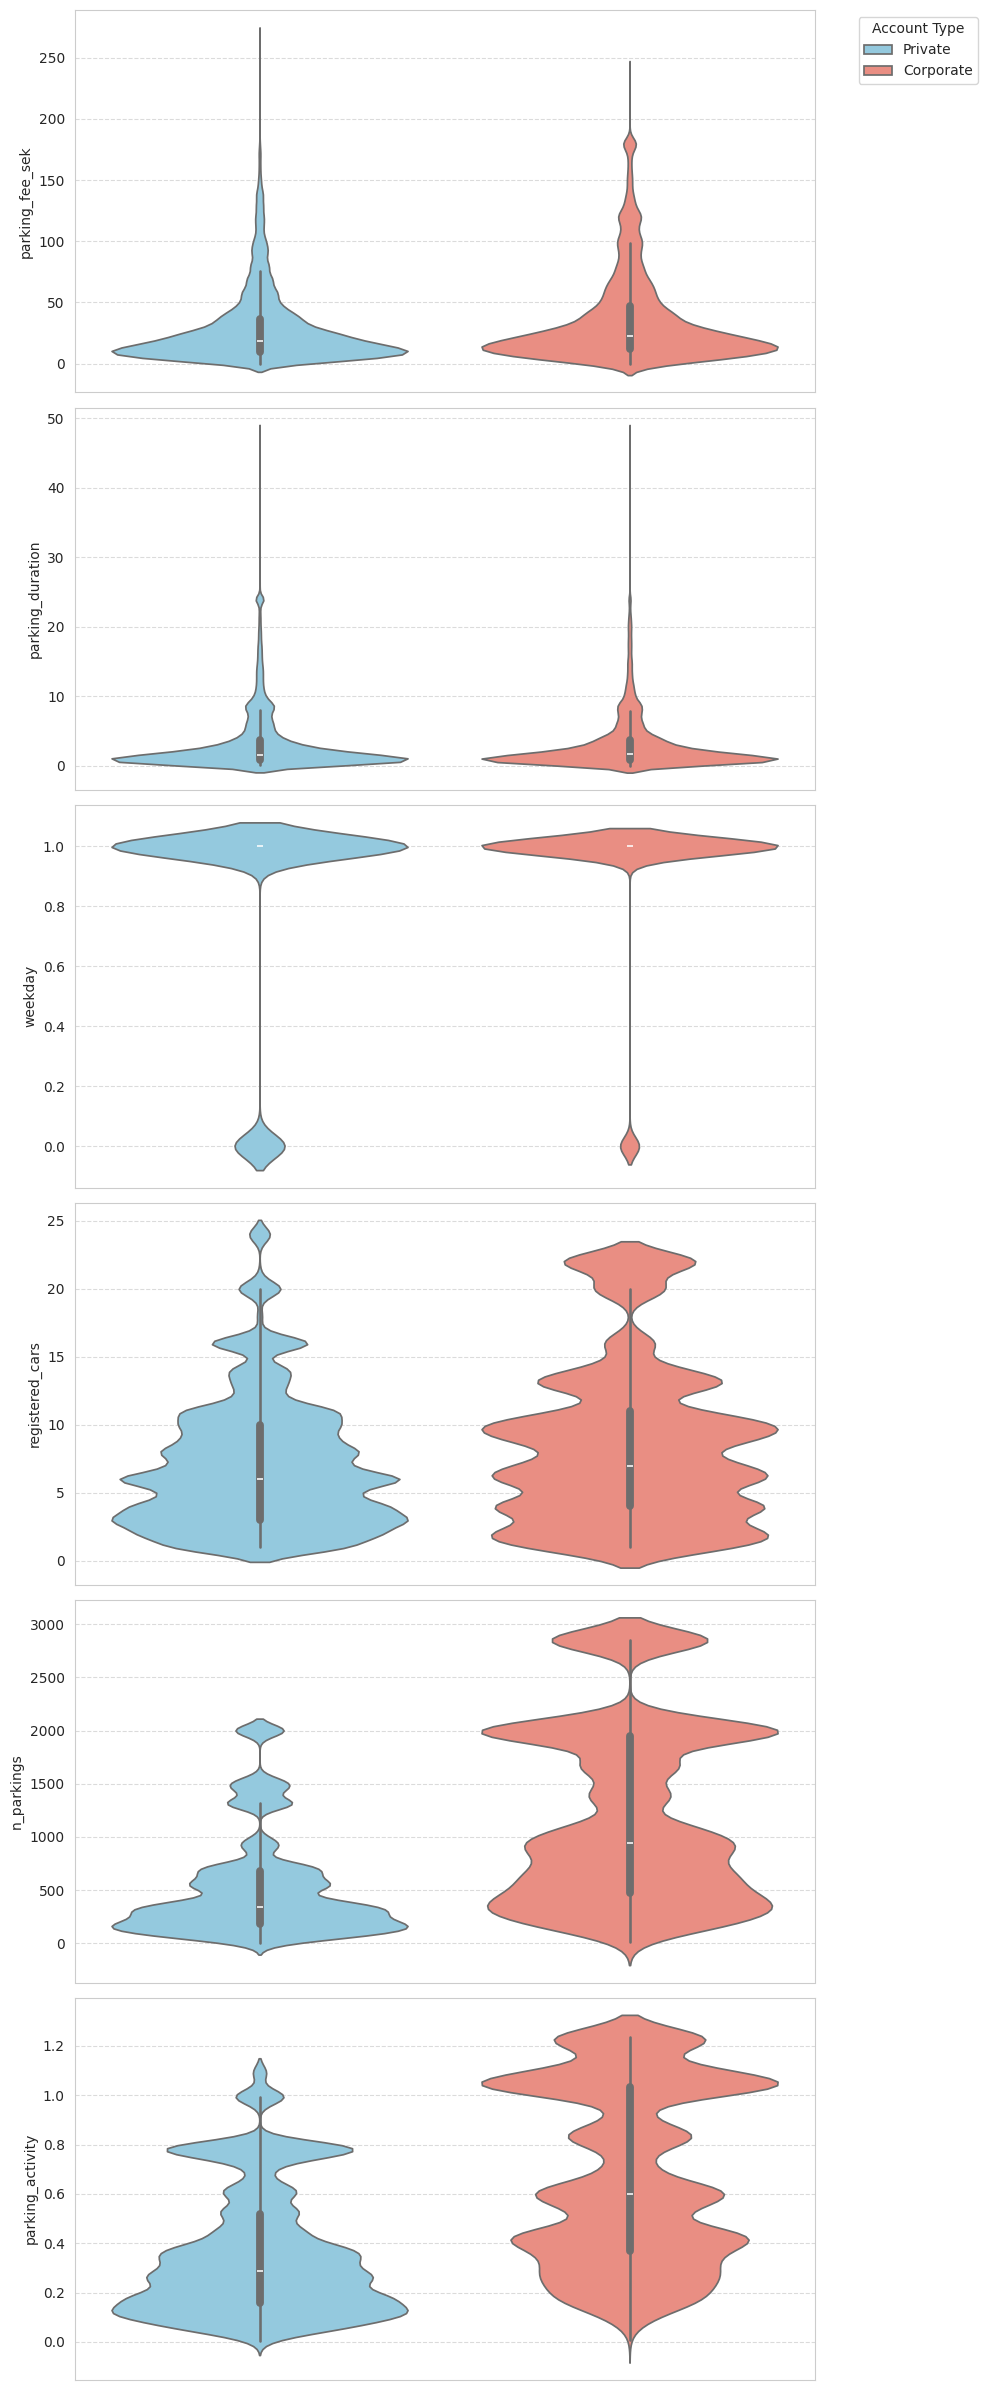

In [104]:
# Convert account_type to string to handle both string and integer cases
df['account_type'] = df['account_type'].astype(str)

# ===== USER INPUT =====
# List the features you want to analyze
features_to_analyze = ['parking_fee_sek', 'parking_duration', "weekday", "registered_cars", 'n_parkings', 'parking_activity']
# ======================

# Set up the plot with a white grid background
sns.set_style("whitegrid")
n_features = len(features_to_analyze)
fig, axes = plt.subplots(n_features, 1, figsize=(10, 4*n_features))

# If only one feature, make sure axes is iterable
if n_features == 1:
    axes = [axes]

# Create plots for each feature
for i, feature in enumerate(features_to_analyze):
    # Create violin plot
    ax = sns.violinplot(
        x='account_type', 
        y=feature, 
        data=df,
        ax=axes[i],
        hue='account_type',
        palette={'0': 'skyblue', '1': 'salmon'},
        legend=(i==0),  # Only show legend for the first plot
        hue_order=['0', '1']  # Ensure consistent order
    )
    
    # Customize the plot
    axes[i].set_ylabel(feature)
    axes[i].set_xlabel('')  # Remove x-axis label
    axes[i].set_xticks([])  # Remove x-ticks
    
    # Customize legend for the first plot
    if i == 0:
        handles, _ = ax.get_legend_handles_labels()
        axes[i].legend(handles, ['Private', 'Corporate'], 
                      title='Account Type',
                      bbox_to_anchor=(1.05, 1),  # Position outside the plot
                      loc='upper left')
    
    # Add grid for better readability
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Aggregated

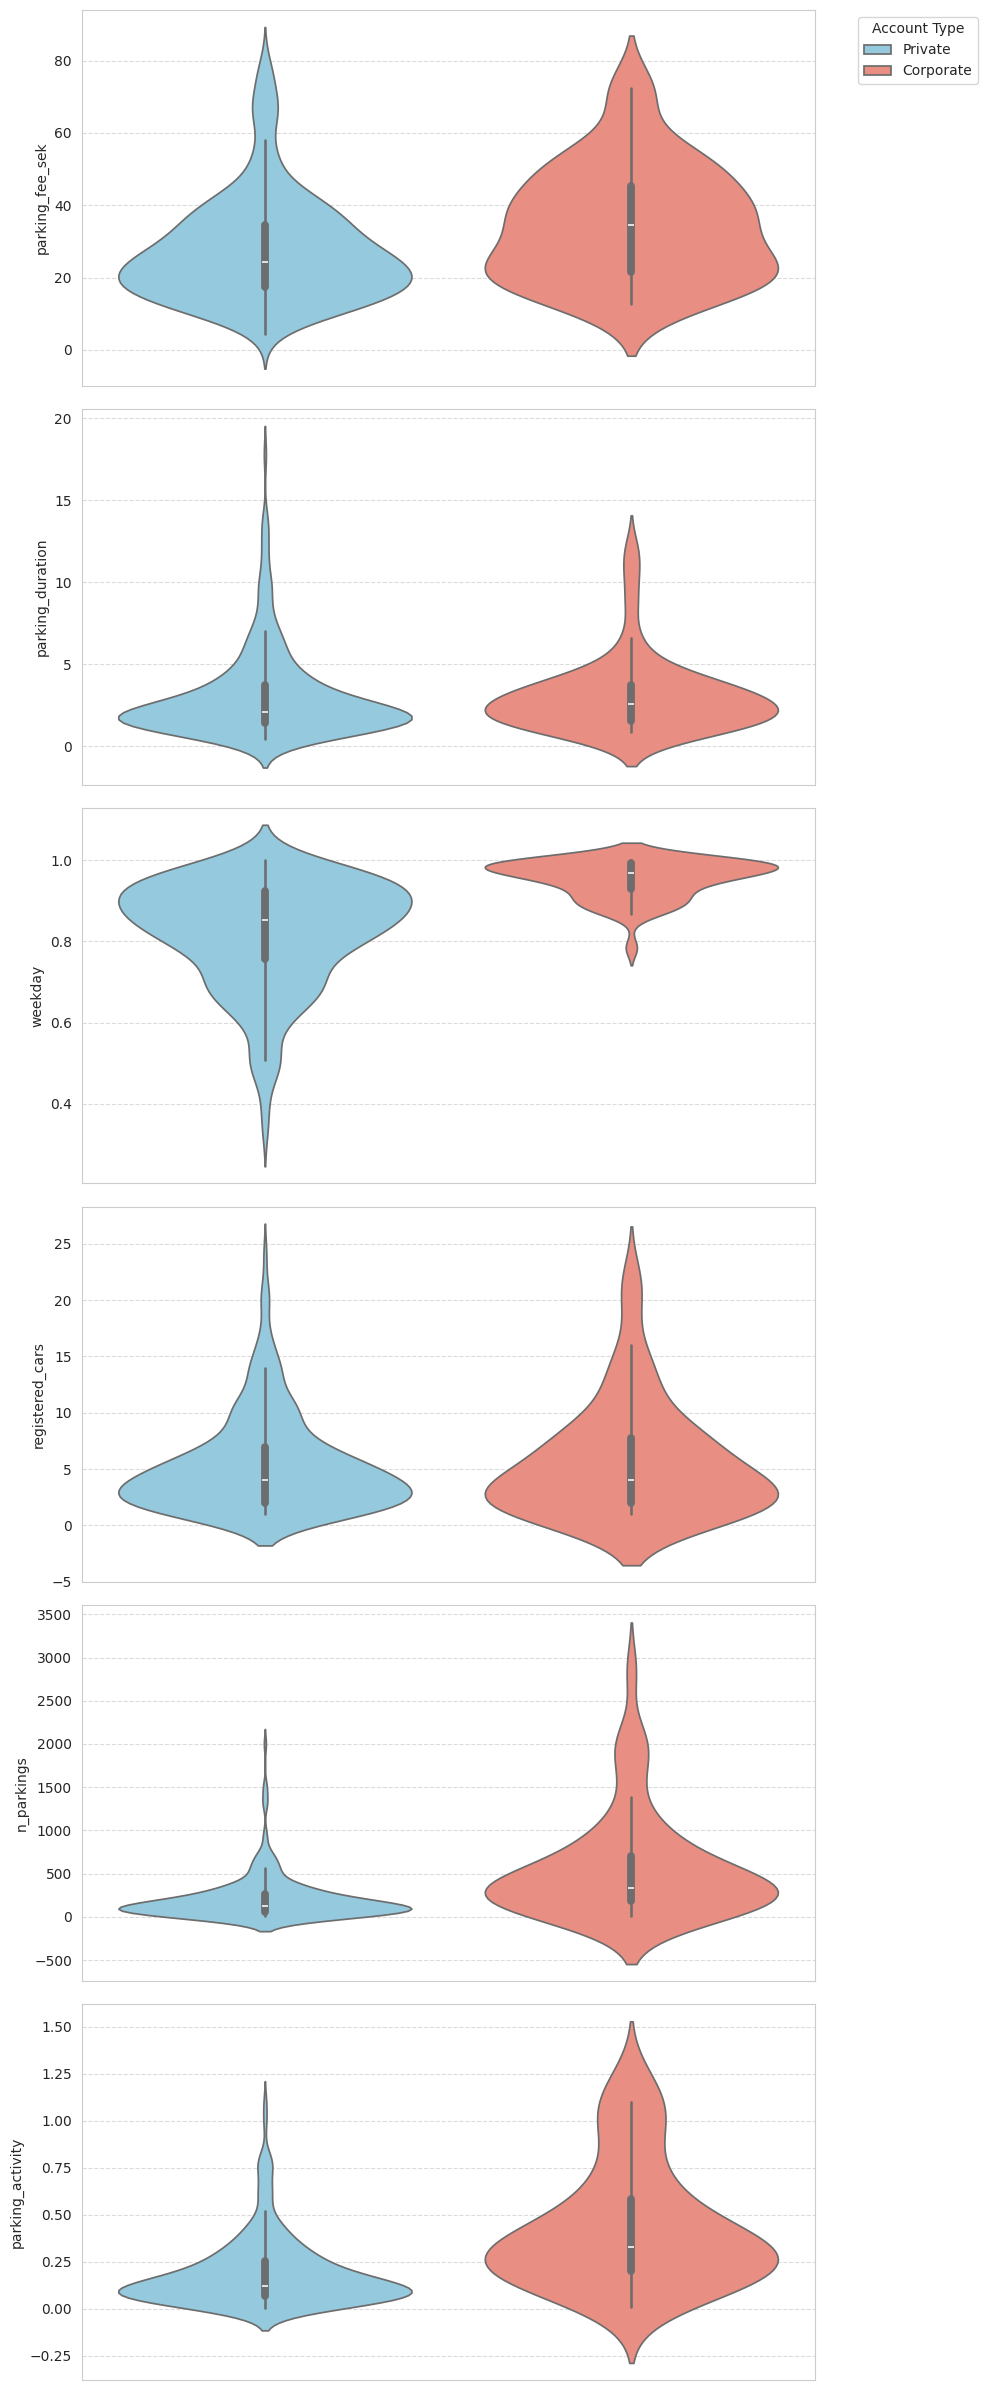

In [105]:
# Convert account_type to string to handle both string and integer cases
df_agg['account_type'] = df_agg['account_type'].astype(str)

# ===== USER INPUT =====
# List the features you want to analyze
features_to_analyze = ['parking_fee_sek', 'parking_duration', "weekday", "registered_cars", 'n_parkings', 'parking_activity']
# ======================

# Set up the plot with a white grid background
sns.set_style("whitegrid")
n_features = len(features_to_analyze)
fig, axes = plt.subplots(n_features, 1, figsize=(10, 4*n_features))

# If only one feature, make sure axes is iterable
if n_features == 1:
    axes = [axes]

# Create plots for each feature
for i, feature in enumerate(features_to_analyze):
    # Create violin plot
    ax = sns.violinplot(
        x='account_type', 
        y=feature, 
        data=df_agg,
        ax=axes[i],
        hue='account_type',
        palette={'0': 'skyblue', '1': 'salmon'},
        legend=i==0,  # Only show legend for the first plot
        hue_order=['0', '1']  # Ensure consistent order
    )
    
    # Customize the plot
    axes[i].set_ylabel(feature)
    axes[i].set_xlabel('')  # Remove x-axis label
    axes[i].set_xticks([])  # Remove x-ticks
    
    # Customize legend for the first plot
    if i == 0:
        handles, _ = ax.get_legend_handles_labels()
        axes[i].legend(handles, ['Private', 'Corporate'], 
                      title='Account Type',
                      bbox_to_anchor=(1.05, 1),  # Position outside the plot
                      loc='upper left')
    
    # Add grid for better readability
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()